In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix



In [2]:
df = pd.read_csv('loan_data.csv')
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [3]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
df.tail()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1
44999,24.0,male,High School,51609.0,1,RENT,6665.0,DEBTCONSOLIDATION,17.05,0.13,3.0,628,No,1


In [5]:
df.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [6]:
df.isna().sum().sum()

0

In [7]:
df.dropna(axis=1)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [8]:
# Example code to check unique values in each column
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")


person_age: 60 unique values
person_gender: 2 unique values
person_education: 5 unique values
person_income: 33989 unique values
person_emp_exp: 63 unique values
person_home_ownership: 4 unique values
loan_amnt: 4483 unique values
loan_intent: 6 unique values
loan_int_rate: 1302 unique values
loan_percent_income: 64 unique values
cb_person_cred_hist_length: 29 unique values
credit_score: 340 unique values
previous_loan_defaults_on_file: 2 unique values
loan_status: 2 unique values


In [9]:
df['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [10]:
df['person_education'].unique()

array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
      dtype=object)

In [11]:
df['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [12]:
df['loan_status'].unique()

array([1, 0], dtype=int64)

In [13]:
per_loan_acc = df[(df['loan_intent']=='PERSONAL') & (df['loan_status']=='1')]
accepted_per = per_loan_acc.shape[0]
print(accepted_per )

0


In [14]:
per_loan_acc = df[(df['loan_intent']=='PERSONAL') & (df['loan_status']=='1')]
accepted_per = per_loan_acc.shape[0]
print(accepted_per )

0


In [15]:
med_loan_acc = df[(df['loan_intent']=='MEDICAL') & (df['loan_status']=='1')]
accepted_med = per_loan_acc.shape[0]
print(accepted_med )

0


In [16]:
print(df['loan_intent'].unique())  # Check unique loan_intent values
print(df['loan_status'].unique())  # Check unique loan_status values


['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
[1 0]


In [17]:
df['loan_status'].count()

45000

In [18]:
# Strip extra spaces from both columns
df['loan_intent'] = df['loan_intent'].str.strip()


# Optionally, standardize case (if necessary)
df['loan_intent'] = df['loan_intent'].str.upper()  # Converts everything to uppercase



In [19]:
# Filter based on 'loan_intent' and 'loan_status'
per_loan_acc = df[(df['loan_intent'] == 'PERSONAL') & (df['loan_status'] == '1')]
print(per_loan_acc.shape[0])  # This should give the number of accepted personal loans

med_loan_acc = df[(df['loan_intent'] == 'MEDICAL') & (df['loan_status'] == '1')]
print(med_loan_acc.shape[0])  # This should give the number of accepted medical loans


0
0


In [20]:
print(per_loan_acc.head())  # Preview filtered data for personal loans
print(med_loan_acc.head())  # Preview filtered data for medical loans


Empty DataFrame
Columns: [person_age, person_gender, person_education, person_income, person_emp_exp, person_home_ownership, loan_amnt, loan_intent, loan_int_rate, loan_percent_income, cb_person_cred_hist_length, credit_score, previous_loan_defaults_on_file, loan_status]
Index: []
Empty DataFrame
Columns: [person_age, person_gender, person_education, person_income, person_emp_exp, person_home_ownership, loan_amnt, loan_intent, loan_int_rate, loan_percent_income, cb_person_cred_hist_length, credit_score, previous_loan_defaults_on_file, loan_status]
Index: []


In [21]:
# Group by loan_intent and loan_status to see the distribution
print(df.groupby(['loan_intent', 'loan_status']).size())


loan_intent        loan_status
DEBTCONSOLIDATION  0              4982
                   1              2163
EDUCATION          0              7601
                   1              1552
HOMEIMPROVEMENT    0              3525
                   1              1258
MEDICAL            0              6170
                   1              2378
PERSONAL           0              6031
                   1              1521
VENTURE            0              6691
                   1              1128
dtype: int64


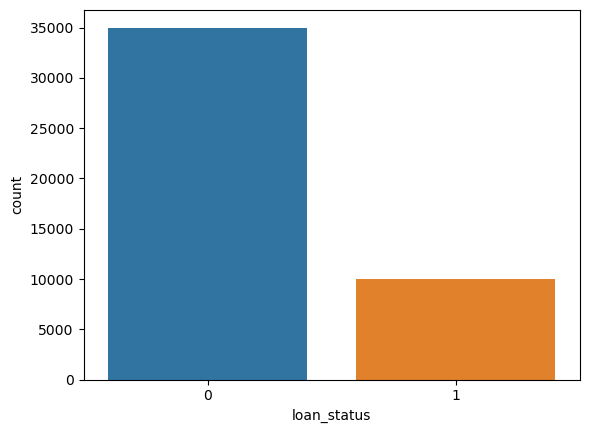

In [22]:
sns.countplot(x='loan_status', data=df)
plt.show()


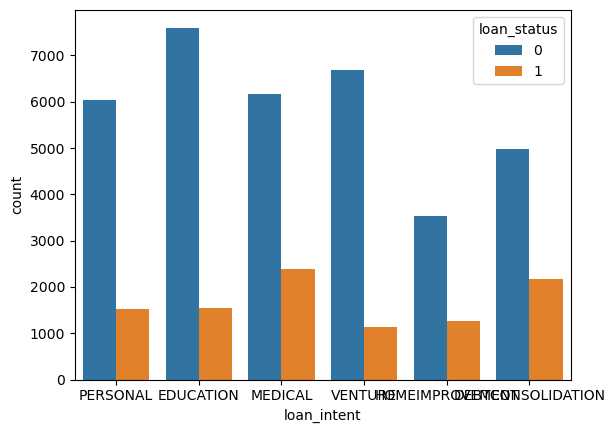

In [23]:
sns.countplot(x='loan_intent', hue='loan_status', data=df)
plt.show()


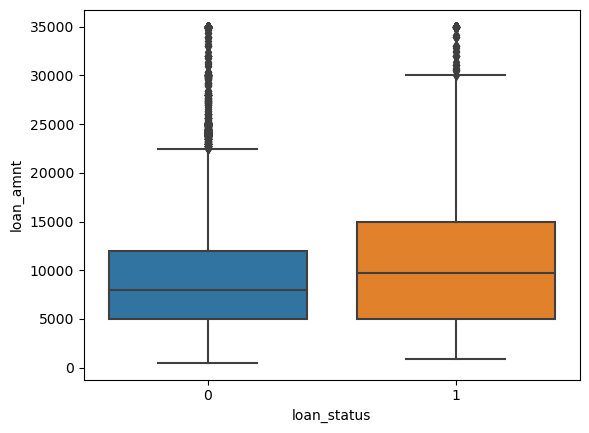

In [24]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df)
plt.show()


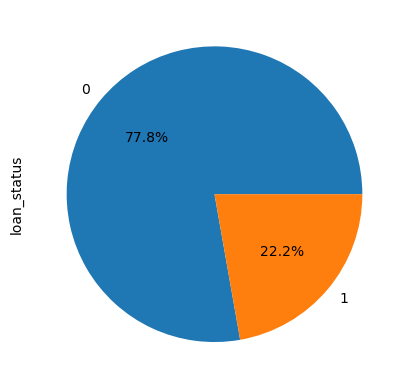

In [25]:
loan_status_counts = df['loan_status'].value_counts()
loan_status_counts.plot.pie(autopct='%1.1f%%')
plt.show()


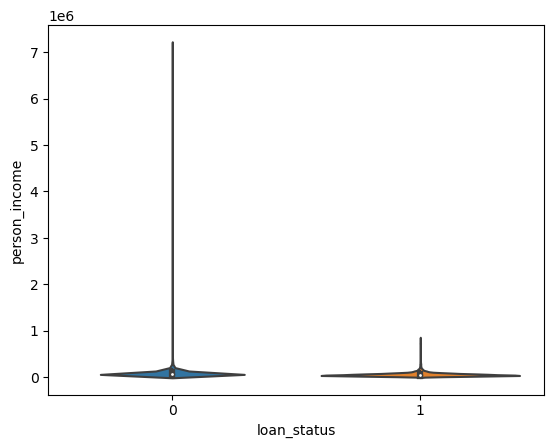

In [26]:
sns.violinplot(x='loan_status', y='person_income', data=df)
plt.show()


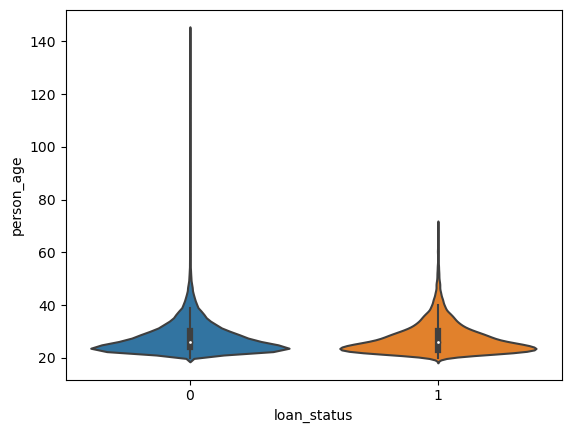

In [27]:
sns.violinplot(x='loan_status', y='person_age', data=df)
plt.show()


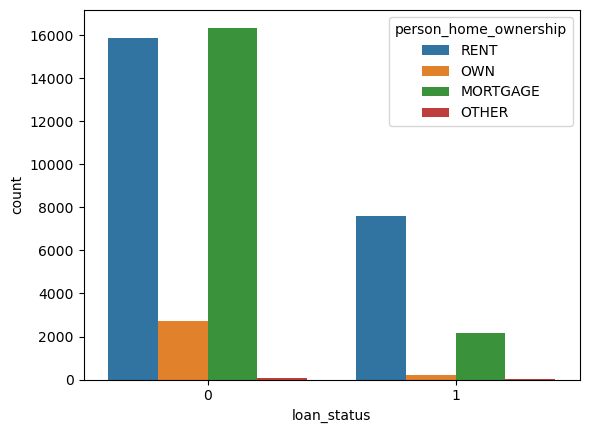

In [28]:
sns.countplot(x='loan_status', hue='person_home_ownership', data=df)
plt.show()


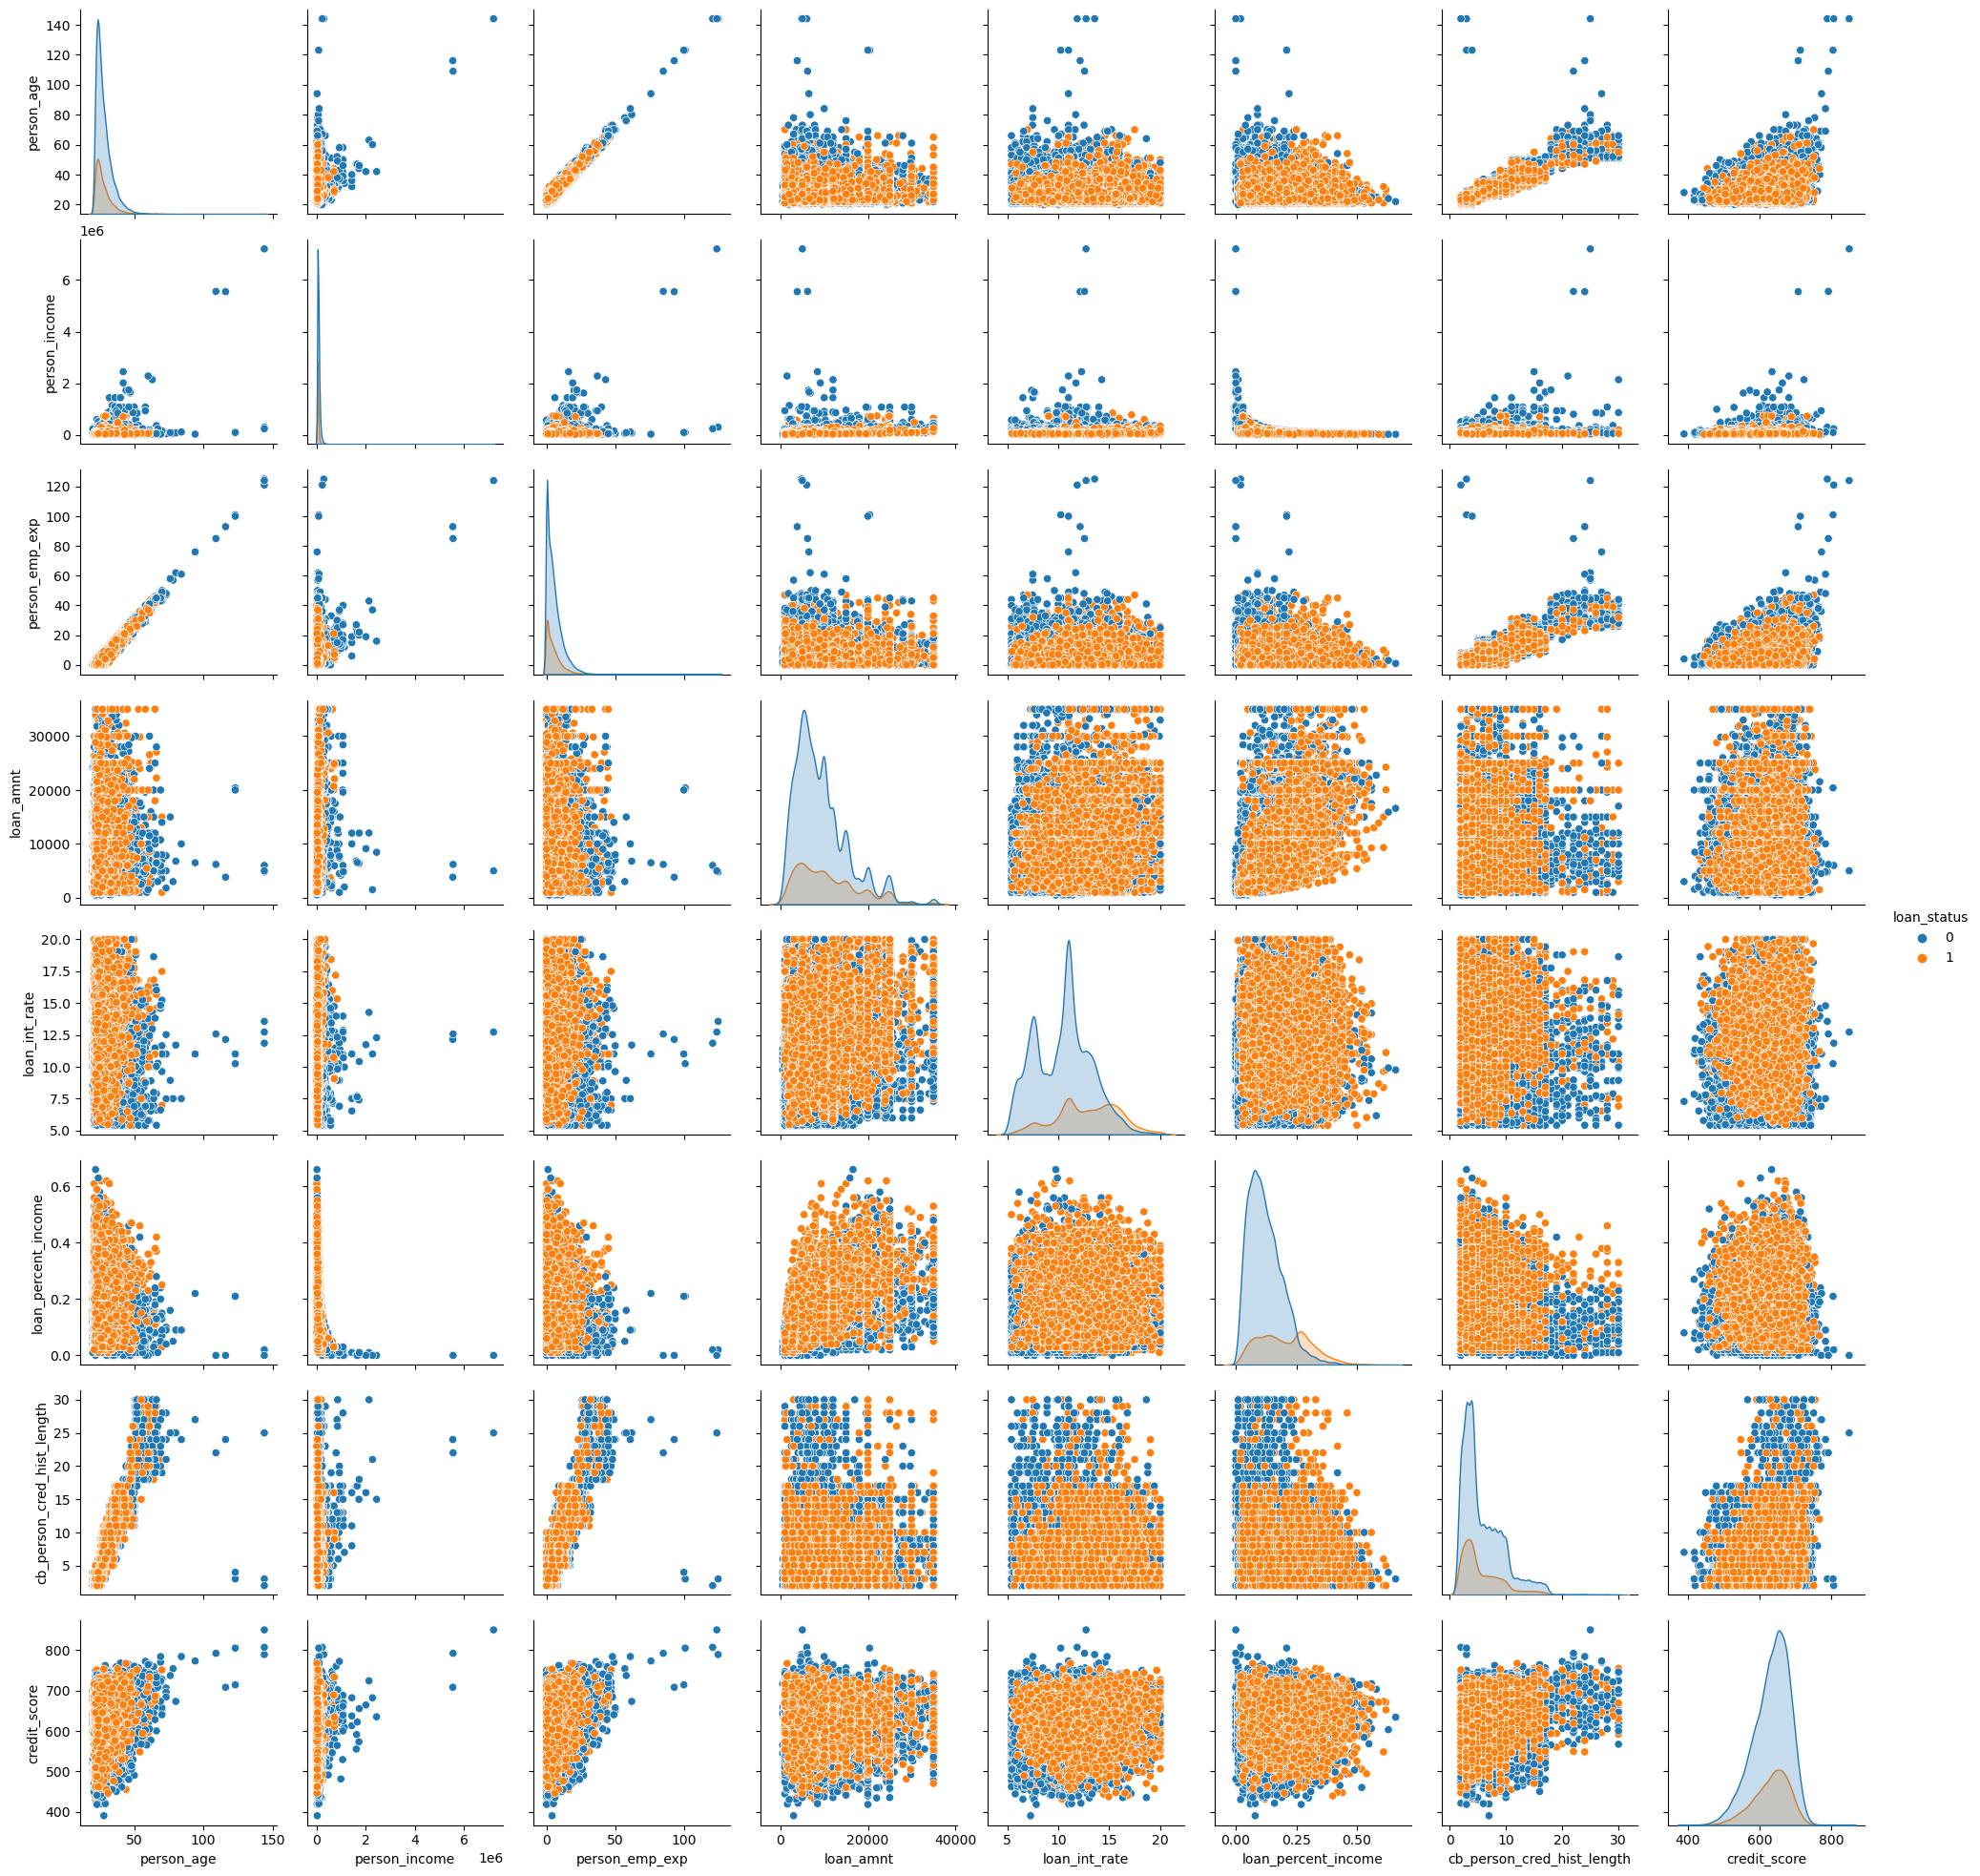

In [29]:
sns.pairplot(df, hue='loan_status')
plt.show()


C:\Users\Ali Akbar\AppData\Local\Temp\ipykernel_49040\3382426767.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


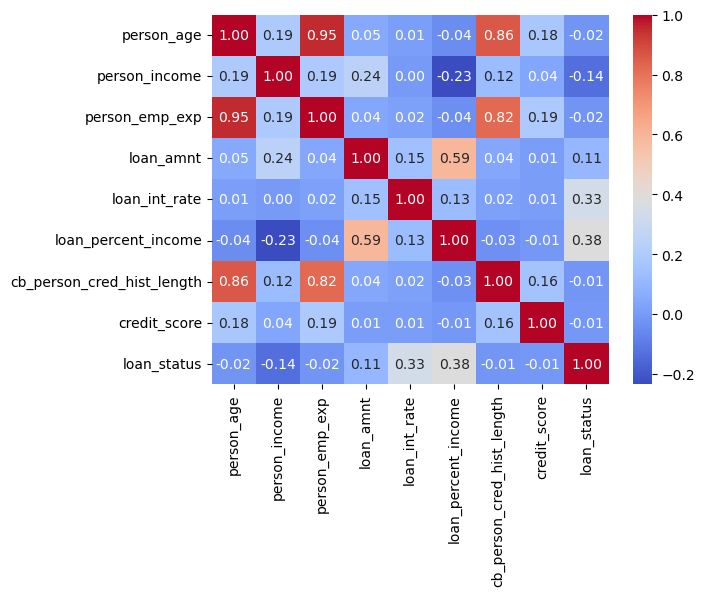

In [30]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [33]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['person_gender']=label_encoder.fit_transform(df['person_gender']) 

In [38]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['person_education'] = label_encoder.fit_transform(df['person_education'])


In [48]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply LabelEncoder to the column that contains categorical values like 'RENT'
df['person_home_ownership'] = label_encoder.fit_transform(df['person_home_ownership'])

In [49]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply LabelEncoder to the column that contains categorical values like 'RENT'
df['previous_loan_defaults_on_file'] = label_encoder.fit_transform(df['previous_loan_defaults_on_file'])

person_age                        float64
person_gender                       int64
person_education                    int64
person_income                     float64
person_emp_exp                      int64
person_home_ownership               int32
loan_amnt                         float64
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
loan_intent_EDUCATION               uint8
loan_intent_HOMEIMPROVEMENT         uint8
loan_intent_MEDICAL                 uint8
loan_intent_PERSONAL                uint8
loan_intent_VENTURE                 uint8
dtype: object


person_age                        float64
person_gender                       int64
person_education                    int64
person_income                     float64
person_emp_exp                      int64
person_home_ownership               int64
loan_amnt                         float64
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file      int32
loan_status                         int64
loan_intent_EDUCATION               uint8
loan_intent_HOMEIMPROVEMENT         uint8
loan_intent_MEDICAL                 uint8
loan_intent_PERSONAL                uint8
loan_intent_VENTURE                 uint8
dtype: object


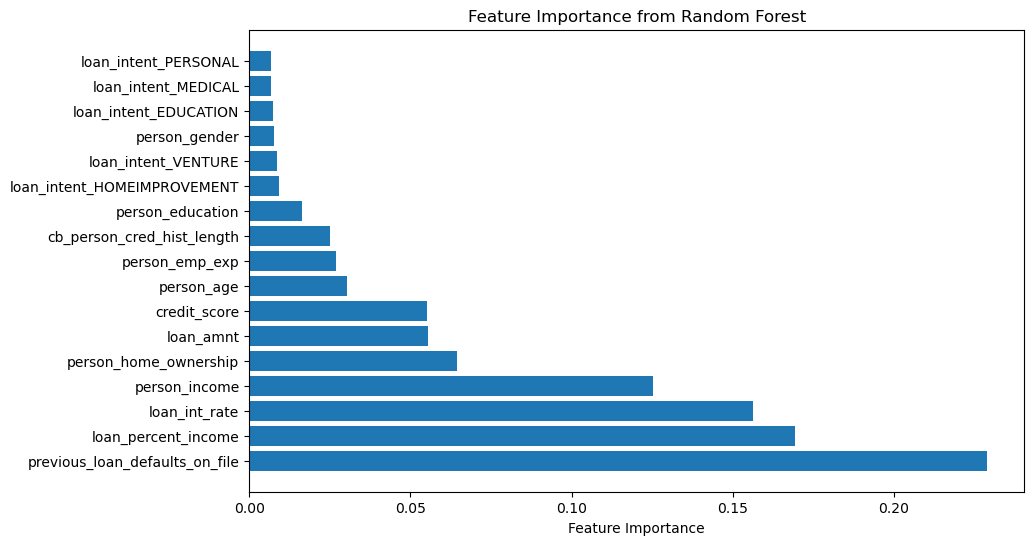

In [51]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Assuming df is your DataFrame loaded from a CSV or other source
# Example: df = pd.read_csv("your_data.csv")

# Step 1: Convert categorical variables to numerical using LabelEncoder (for 'gender' or any other categorical columns)
label_encoder = LabelEncoder()

# Apply label encoding to all columns that are categorical (just an example for 'gender')
df['person_gender'] = label_encoder.fit_transform(df['person_gender'])

# If there are other categorical columns, apply encoding here. For example:
# df['loan_intent'] = label_encoder.fit_transform(df['loan_intent'])



# Step 3: Check that all columns are numeric after encoding
print(df.dtypes)  # This will show you the data types of all columns

# Step 4: Define features (X) and target (y)
X = df.drop(columns=['loan_status'])  # Replace 'loan_status' with your target column
y = df['loan_status']  # Replace 'loan_status' with your target column

# Step 5: Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Train RandomForest model
mode = RandomForestClassifier(n_estimators=100, random_state=42)
mode.fit(X_train, y_train)

# Step 7: Get the feature importance from the trained model
importances = model.feature_importances_

# Step 8: Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 9: Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()


In [56]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix



# Build and train the model

model = LogisticRegression()

model.fit(X_train, y_train)



# Make predictions

Y_pred = model.predict(X_test)



# Evaluate the model

print("Confusion Matrix:")

print(confusion_matrix(y_test, Y_pred))

print("\nClassification Report:")

print(classification_report(y_test, Y_pred))

Confusion Matrix:
[[9968  525]
 [1875 1132]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     10493
           1       0.68      0.38      0.49      3007

    accuracy                           0.82     13500
   macro avg       0.76      0.66      0.69     13500
weighted avg       0.81      0.82      0.80     13500

